In [38]:
#Import Packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.decomposition import PCA



In [32]:
#Read Data
data = pd.read_csv("/Users/jessicagroven/Desktop/Text Mining/TM Project/LemCVData.csv")
data = data[data["Sentiment"] != "remove"]

sentiment_labels = data["Sentiment"]
type_labels = data["Type"]

data = data.iloc[:, 3:23]

data

,andy,billie,cat,council,cultivated,eilish,extract,file,japanese,john,jpg,melbourne,simnett,straw,tokyo,uploads,usd,whey,william,wp
0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,11,0,0,0,0,0
1,0,0,0,0,0,0,0,0,22,0,0,0,0,0,16,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
#Apply Standard Scaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)
df_scaled
df_scaled_print = pd.DataFrame(df_scaled, columns=data.columns)
df_scaled_print

,andy,billie,cat,council,cultivated,eilish,extract,file,japanese,john,jpg,melbourne,simnett,straw,tokyo,uploads,usd,whey,william,wp
0,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,6.386413,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,4.576575,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444
1,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,7.042420,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,6.731086,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444
2,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,-0.173649,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,-0.163349,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444
3,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,-0.173649,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,-0.163349,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444
4,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,-0.173649,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,-0.163349,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,-0.173649,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,-0.163349,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444
149,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,-0.173649,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,-0.163349,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444
150,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,-0.173649,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,-0.163349,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444
151,0.0,-0.086575,-0.14736,-0.082556,-0.083604,-0.089316,-0.160817,-0.108227,-0.173649,-0.149992,-0.133825,-0.081111,-0.139747,-0.084779,-0.163349,-0.123886,-0.119296,-0.106428,-0.106449,-0.127444


In [62]:
df_scaled_print.to_csv("scaled_unlabeled_CV_data.csv", index = False)

In [76]:
df_scaled_print.describe()

,andy,billie,cat,council,cultivated,eilish,extract,file,japanese,john,jpg,melbourne,simnett,straw,tokyo,uploads,usd,whey,william,wp
count,153.0,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02
mean,0.0,0.000000,2.104344e-17,1.161018e-17,-1.161018e-17,1.161018e-17,-8.707632e-18,-1.161018e-17,-6.966105e-17,1.161018e-17,1.161018e-17,-1.741526e-17,2.322035e-17,0.000000,-2.902544e-17,-3.483053e-17,-1.741526e-17,1.741526e-17,-2.322035e-17,5.805088e-18
std,0.0,1.003284,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00
min,0.0,-0.086575,-1.473601e-01,-8.255565e-02,-8.360369e-02,-8.931586e-02,-1.608169e-01,-1.082265e-01,-1.736487e-01,-1.499923e-01,-1.338247e-01,-8.111071e-02,-1.397473e-01,-0.084779,-1.633485e-01,-1.238864e-01,-1.192960e-01,-1.064285e-01,-1.064493e-01,-1.274437e-01
25%,0.0,-0.086575,-1.473601e-01,-8.255565e-02,-8.360369e-02,-8.931586e-02,-1.608169e-01,-1.082265e-01,-1.736487e-01,-1.499923e-01,-1.338247e-01,-8.111071e-02,-1.397473e-01,-0.084779,-1.633485e-01,-1.238864e-01,-1.192960e-01,-1.064285e-01,-1.064493e-01,-1.274437e-01
50%,0.0,-0.086575,-1.473601e-01,-8.255565e-02,-8.360369e-02,-8.931586e-02,-1.608169e-01,-1.082265e-01,-1.736487e-01,-1.499923e-01,-1.338247e-01,-8.111071e-02,-1.397473e-01,-0.084779,-1.633485e-01,-1.238864e-01,-1.192960e-01,-1.064285e-01,-1.064493e-01,-1.274437e-01
75%,0.0,-0.086575,-1.473601e-01,-8.255565e-02,-8.360369e-02,-8.931586e-02,-1.608169e-01,-1.082265e-01,-1.736487e-01,-1.499923e-01,-1.338247e-01,-8.111071e-02,-1.397473e-01,-0.084779,-1.633485e-01,-1.238864e-01,-1.192960e-01,-1.064285e-01,-1.064493e-01,-1.274437e-01
max,0.0,12.318325,8.992947e+00,1.232686e+01,1.232593e+01,1.230482e+01,1.077473e+01,1.200786e+01,7.042420e+00,1.077802e+01,9.113032e+00,1.232883e+01,7.762050e+00,12.322503,7.592890e+00,1.119231e+01,1.190050e+01,1.201157e+01,1.210860e+01,1.035583e+01


In [90]:
#Perform K-mean clustering on CV top 20 dataset
#Kmeans Clustering
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

silhouetteResults = []


range_n_clusters = [2, 3, 4, 5]
X = df_scaled_print
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouetteResults.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )




For n_clusters = 2 The average silhouette_score is : 0.7270644612278004
For n_clusters = 3 The average silhouette_score is : 0.7373778093160193
For n_clusters = 4 The average silhouette_score is : 0.7505687462884157
For n_clusters = 5 The average silhouette_score is : 0.7608301635363617


In [60]:
#Perform PCA transformation to reduce to 3 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,-0.463779,-3.018660,7.126543
1,-0.517924,-3.762685,8.957017
2,-0.269975,-0.024605,-0.236066
3,-0.269975,-0.024605,-0.236066
4,-0.269975,-0.024605,-0.236066
...,...,...,...
148,-0.269975,-0.024605,-0.236066
149,-0.269975,-0.024605,-0.236066
150,-0.269975,-0.024605,-0.236066
151,-0.269975,-0.024605,-0.236066


In [78]:
principalDf.to_csv("pca_3comp_data.csv", index = False)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [82]:
#Perform K-mean clustering on PCA dataset
#Kmeans Clustering
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

range_n_clusters = [2, 3, 4, 5]
X = principalDf
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )




For n_clusters = 2 The average silhouette_score is : 0.927844932519036
For n_clusters = 3 The average silhouette_score is : 0.9348883672584984
For n_clusters = 4 The average silhouette_score is : 0.9566466484261352
For n_clusters = 5 The average silhouette_score is : 0.9553287733827353


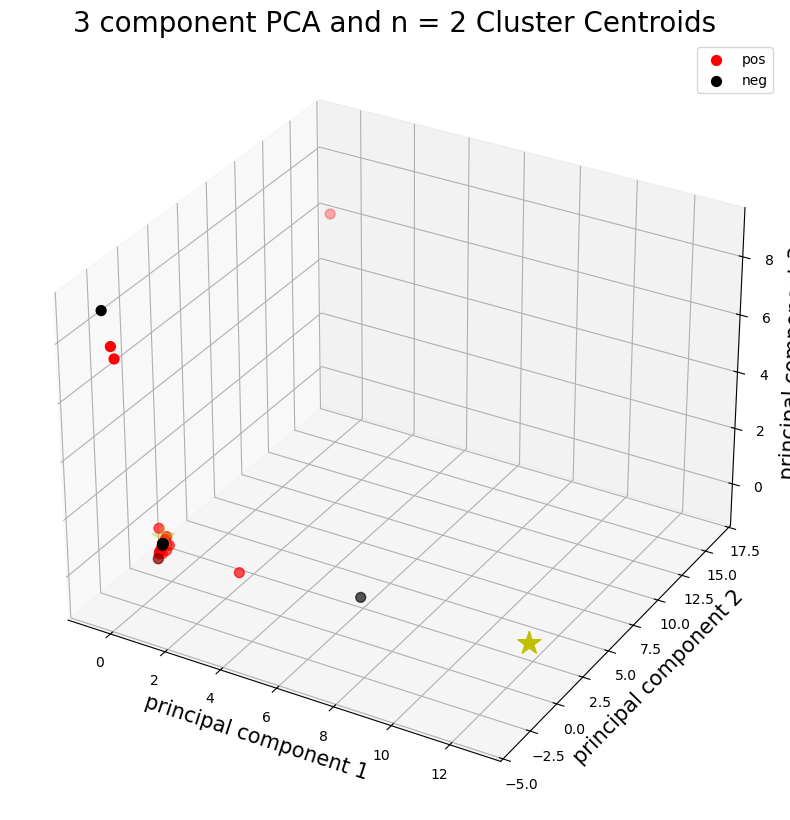

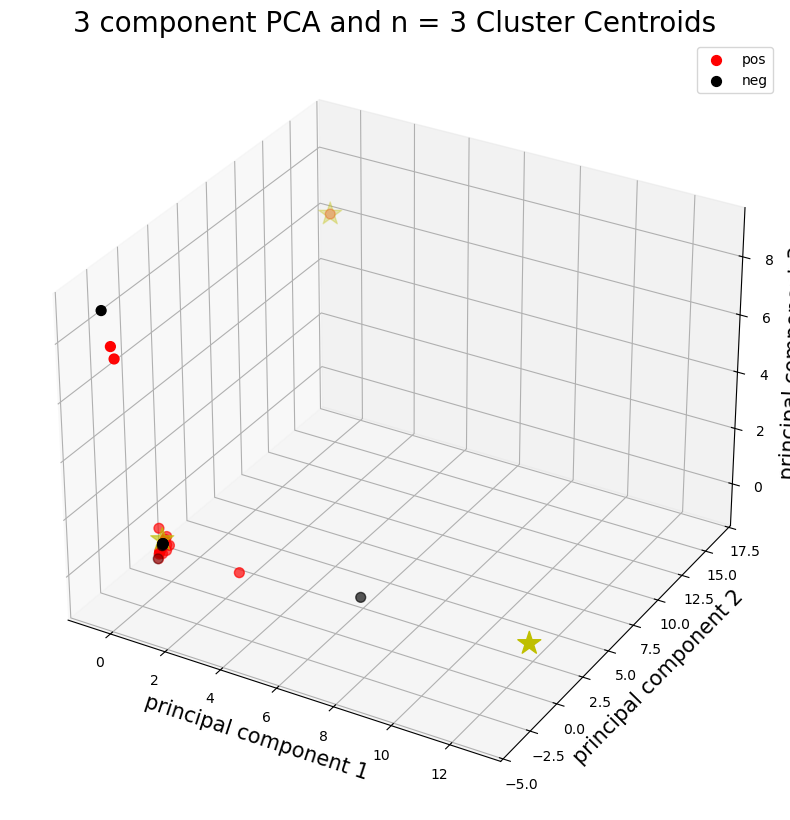

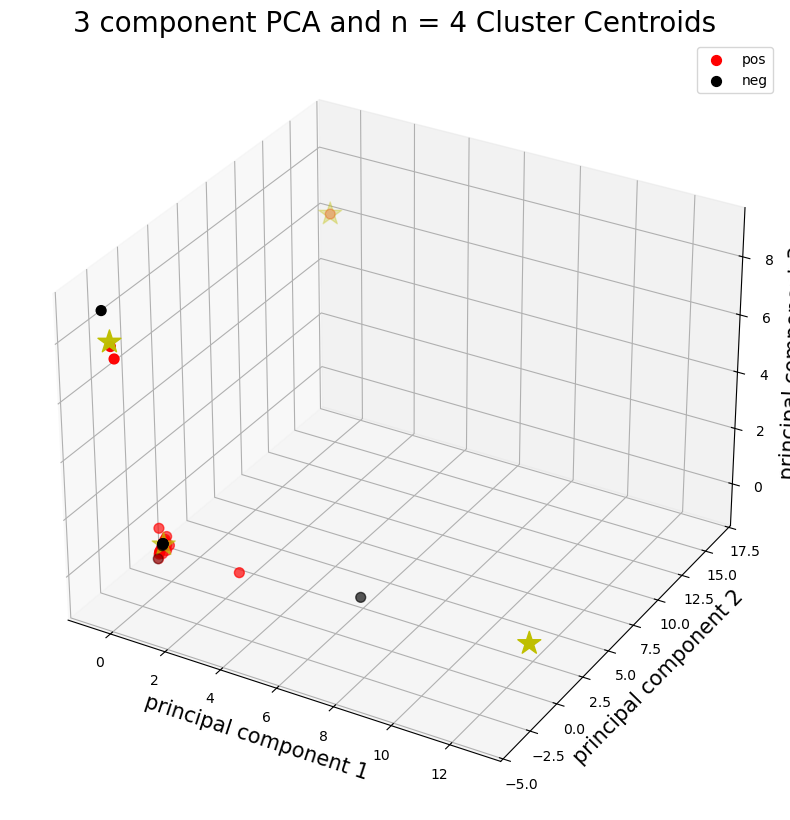

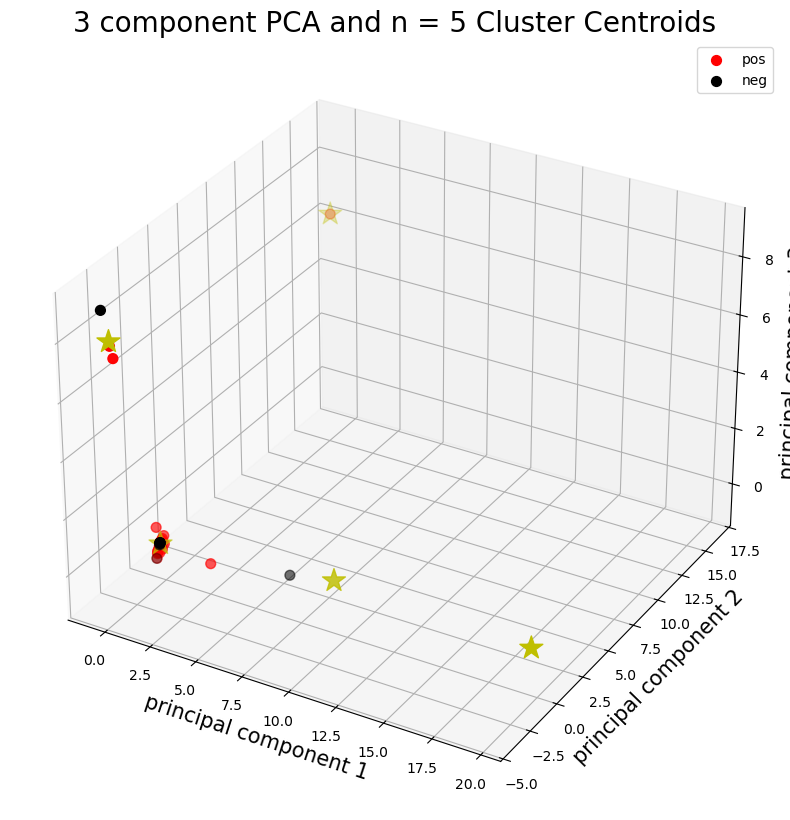

In [88]:
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = model.fit_predict(X)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('principal component 1', fontsize = 15)
    ax.set_ylabel('principal component 2', fontsize = 15)
    ax.set_zlabel('principal component 3', fontsize = 15)
    ax.set_title(f'3 component PCA and n = {n_clusters} Cluster Centroids', fontsize = 20)

    finalDf = pd.concat([principalDf, sentiment_labels], axis = 1)
    targetsName = ['pos', 'neg']
    targets = ['pos', 'neg']
    colors = ['r', 'k']

    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Sentiment'] == target
        ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
                , c = color
                , s = 50)
    ax.legend(targetsName)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
           model.cluster_centers_[:,2], s = 300, c = 'y',
           marker='*', label = 'Centroid')
    ax.grid()


In [92]:
range_n_clusters = [2, 3, 4, 5]
X = principalDf
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouetteResults.append(silhouette_avg)

    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )



For n_clusters = 2 The average silhouette_score is : 0.927844932519036
For n_clusters = 3 The average silhouette_score is : 0.9348883672584984
For n_clusters = 4 The average silhouette_score is : 0.9566466484261352
For n_clusters = 5 The average silhouette_score is : 0.9553287733827353


In [52]:
#Explained variance
import numpy as np
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

cumulative_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(cumulative_variance))],
    'Cumulative Variance': cumulative_variance
})

cumulative_variance_df.round(4)

,Principal Component,Cumulative Variance
0,PC1,0.2022
1,PC2,0.3080
2,PC3,0.4099


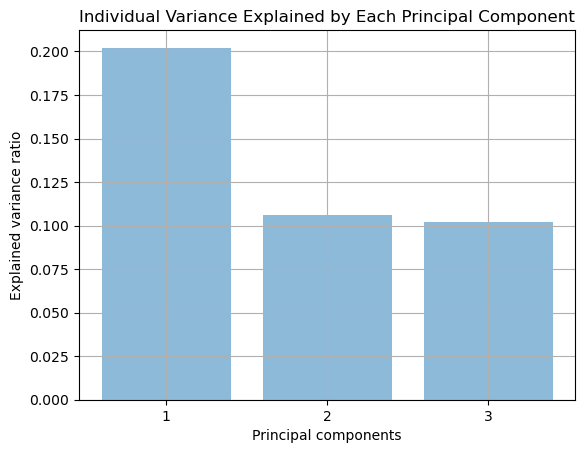

In [54]:
# Plot for individual explained variance
import matplotlib.pyplot as plt

plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

In [94]:
#Plot the Silhouette results
silhouetteResults

[0.7270644612278004,
 0.7373778093160193,
 0.7505687462884157,
 0.7608301635363617,
 0.927844932519036,
 0.9348883672584984,
 0.9566466484261352,
 0.9553287733827353]

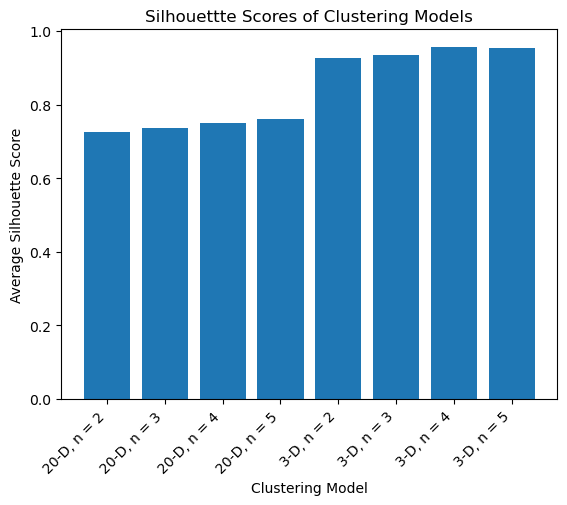

In [104]:
plt.figure()
plt.bar(["20-D, n = 2","20-D, n = 3", "20-D, n = 4", "20-D, n = 5",  "3-D, n = 2","3-D, n = 3","3-D, n = 4","3-D, n = 5"] , silhouetteResults, align='center')
plt.ylabel('Average Silhouette Score')
plt.xlabel('Clustering Model')
plt.xticks(rotation=45, ha='right')

#plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Silhouettte Scores of Clustering Models')
#plt.grid(True)
plt.show()